In [3]:
!pip install fastai --quiet
from fastai.vision.all import *

In [4]:
path = untar_data(URLs.PETS)
path_imgs = path/"images"

In [5]:
print(path.ls())
print(path_imgs.ls()[:5])

[Path('/root/.fastai/data/oxford-iiit-pet/annotations'), Path('/root/.fastai/data/oxford-iiit-pet/images')]
[Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_70.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_140.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_147.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_190.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_7.jpg')]


In [6]:
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg'), 'name'),
    splitter=RandomSplitter(seed=42),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
    )

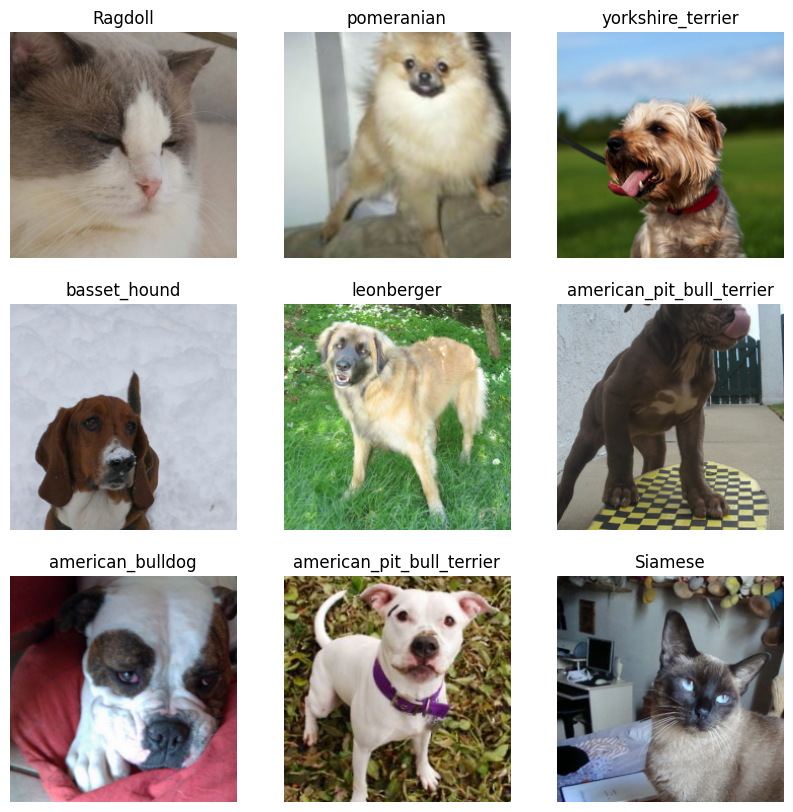

In [7]:
dls = pets.dataloaders(path_imgs)
dls.show_batch(max_n=9, figsize=(10, 10))

In [8]:
print(dls.vocab)
print(dls.c)
print(dls.bs)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']
37
64


In [9]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 118MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.546733,0.320437,0.102165,01:06


epoch,train_loss,valid_loss,error_rate,time
0,0.515399,0.320486,0.099459,01:05
1,0.323217,0.213558,0.065629,01:07


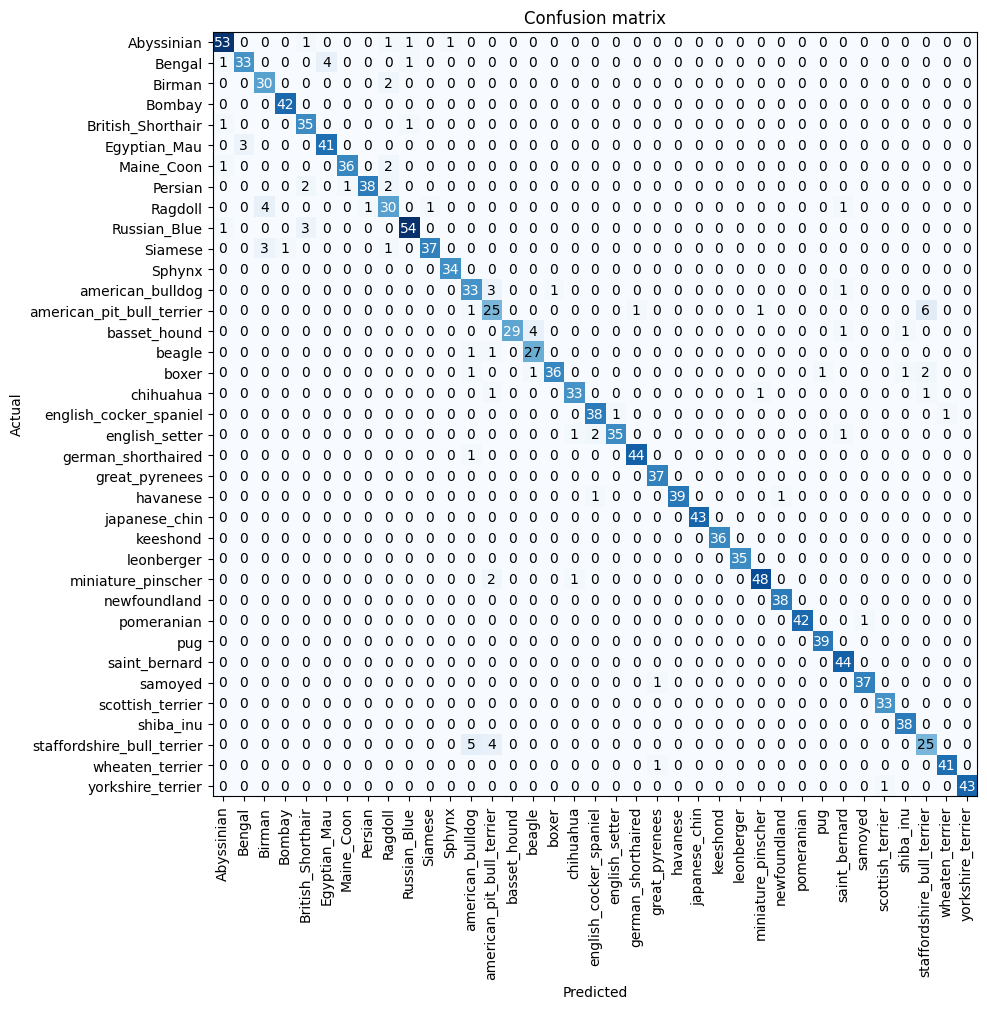

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))

SuggestedLRs(valley=2.2908675418875646e-06)

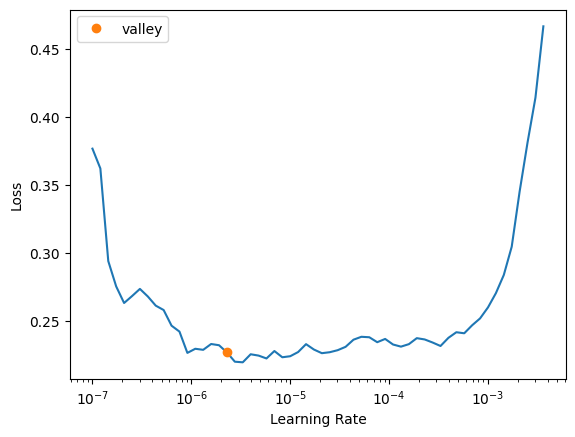

In [11]:
learn.lr_find()

In [12]:
learn.freeze()
learn.fit_one_cycle(2, 1e-3)

learn.unfreeze()
learn.fit_one_cycle(4, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.258198,0.199528,0.056834,01:01
1,0.206046,0.200276,0.062923,01:03


epoch,train_loss,valid_loss,error_rate,time
0,0.169666,0.189805,0.057510,01:05
1,0.160837,0.184019,0.057510,01:04
2,0.135286,0.177794,0.053451,01:05
3,0.141529,0.179154,0.053451,01:05


In [13]:
learn.fit_one_cycle(5, lr_max=slice(1e-6, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.153674,0.202052,0.060893,01:06
1,0.178429,0.249417,0.066982,01:06
2,0.154589,0.219937,0.061570,01:06
3,0.097389,0.205115,0.051421,01:05
4,0.086368,0.201091,0.052097,01:04


In [14]:
learn.export("model.pkl")